#### This file will contain be a combination of all 3 notebooks: 10-import, 20-Exploratory_Data_Analysis, 30-Feature_Engineering, 40-Modeling

### 10-import

#### Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

#### Read in data

In [7]:
df = pd.read_csv('cbb.csv')

#### Inspect data

In [8]:
## view the first 5 rows of the dataset
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
TEAM          1757 non-null object
CONF          1757 non-null object
G             1757 non-null int64
W             1757 non-null int64
ADJOE         1757 non-null float64
ADJDE         1757 non-null float64
BARTHAG       1757 non-null float64
EFG_O         1757 non-null float64
EFG_D         1757 non-null float64
TOR           1757 non-null float64
TORD          1757 non-null float64
ORB           1757 non-null float64
DRB           1757 non-null float64
FTR           1757 non-null float64
FTRD          1757 non-null float64
2P_O          1757 non-null float64
2P_D          1757 non-null float64
3P_O          1757 non-null float64
3P_D          1757 non-null float64
ADJ_T         1757 non-null float64
WAB           1757 non-null float64
POSTSEASON    340 non-null object
SEED          340 non-null float64
YEAR          1757 non-null int64
dtypes: float64(18), int64(3), object(3)

In [10]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,...,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,340.000000,1757.000000
mean,31.523051,16.513375,103.542402,103.542459,0.493398,50.120489,50.312806,18.591804,18.521286,29.277120,...,35.097894,35.373307,49.135970,49.298065,34.563517,34.744792,68.422254,-7.837109,8.791176,2017.002277
std,2.602819,6.545571,7.304975,6.472676,0.255291,3.130430,2.859604,1.991637,2.108968,4.101782,...,4.884599,5.900935,3.422136,3.288265,2.742323,2.369727,3.258920,6.988694,4.674090,1.415419
min,24.000000,0.000000,76.700000,84.000000,0.007700,39.400000,39.600000,12.400000,10.200000,15.000000,...,21.600000,21.800000,37.700000,37.700000,25.200000,27.100000,57.200000,-25.200000,1.000000,2015.000000
25%,30.000000,12.000000,98.600000,98.900000,0.283700,48.100000,48.400000,17.200000,17.100000,26.600000,...,31.700000,31.200000,46.900000,47.100000,32.600000,33.100000,66.400000,-13.000000,5.000000,2016.000000
50%,31.000000,16.000000,103.100000,103.800000,0.474000,50.000000,50.300000,18.500000,18.500000,29.400000,...,34.900000,34.900000,49.000000,49.300000,34.600000,34.700000,68.500000,-8.400000,9.000000,2017.000000
75%,33.000000,21.000000,108.100000,108.000000,0.710600,52.100000,52.300000,19.800000,19.900000,31.900000,...,38.300000,39.200000,51.400000,51.500000,36.400000,36.300000,70.400000,-3.100000,13.000000,2018.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,59.800000,59.500000,26.100000,28.000000,42.100000,...,51.000000,58.500000,62.600000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2019.000000


In [11]:
## size of dataset
df.shape

(1757, 24)

In [12]:
## any NA values
df.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1417
SEED          1417
YEAR             0
dtype: int64

##### From this, I can conclude/confirm that there are only two columns that contain NA values. In the case of this dataset and for the purposes of this project, these NA values actually tell us something: that "(1757-340)= 1417" teams have never made it to the March Madness tournament.

#### Inspecting the target column, "SEED"

In [13]:
df['SEED'].values

array([ 1.,  1.,  3., ...,  2., 11.,  4.])

In [14]:
df['SEED'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1.0
1        1.0
2        3.0
3        3.0
4        1.0
        ... 
1752     7.0
1753     3.0
1754     2.0
1755    11.0
1756     4.0
Name: SEED, Length: 1757, dtype: float64>

In [15]:
print(np.min(df['SEED']))
print(np.max(df['SEED']))

1.0
16.0


##### This informs me that the highest SEED number is 16, for each basketball tournament. (Refer to *00_dataset-variables.ipynb* for more information on "SEED")

In [16]:
df['YEAR'].unique()

array([2016, 2015, 2018, 2019, 2017])

##### The dataset spans 5 years.

### 20-Exploratory Data Analysis

#### Which columns in the dataset contain numeric values?

In [17]:
numeric_df = df.select_dtypes(include=['int', 'float'])

# Print the column names contained in df
print(numeric_df.columns)

Index(['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'SEED', 'YEAR'],
      dtype='object')


#### Explore the values in each of these numeric columns to determine which ones are necessary for the purposes of my project:

In [18]:
print(df['G'].values)
print(df['W'].values)
print(df['ADJOE'].values)
print(df['BARTHAG'].values)
print(df['EFG_O'].values)

[40 40 40 ... 36 35 37]
[33 36 33 ... 31 27 32]
[123.3 129.1 114.4 ... 122.8 117.4 117.2]
[0.9531 0.9758 0.9375 ... 0.9488 0.9238 0.9192]
[52.6 54.8 53.9 ... 55.3 55.2 57. ]


##### From inspecting the values of only 5 columns fromthe dataset, I can tell that there is the need to either standardize or normalize the values in the various numeric columns of my dataset. I will do this in the feature emginnering notebook, "30-Feature Engineering"

#### Which columns in the dataset contain string values?

In [19]:
string_df = df.select_dtypes(include=['object'])
print(string_df.columns)

Index(['TEAM', 'CONF', 'POSTSEASON'], dtype='object')


#### Explore the values in each of these three columns to determine if they should be used for predictions:

In [20]:
print(df['TEAM'].values)
print(df['CONF'].values)
print(df['POSTSEASON'].values)

['North Carolina' 'Wisconsin' 'Michigan' ... 'Tennessee' 'Gonzaga'
 'Gonzaga']
['ACC' 'B10' 'B10' ... 'SEC' 'WCC' 'WCC']
['2ND' '2ND' '2ND' ... 'S16' 'S16' 'S16']


##### It could be helpful to explore the number of teams that make it to the tournament from each league (Ex. ACC, B10, SEC, etc), how highly they're ranked in the national tournament, and how their performaces vary from year to year. However, these explorations would not be necessary, for the purposes of my project. 

#### Check the distribution of the features in the dataset because most ML models assume that the data is normally distributed:

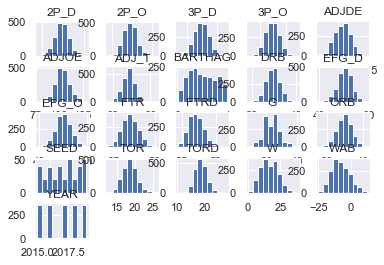

In [21]:
df.hist()
plt.show()

#### I'd like to explore the possibility of some of the features in the dataset being correlated/having a relationship:

In [ ]:
sns.pairplot(df)
plt.show()

#### From quick observation, some of the positive correlations make a lot of sense. For example:
- BARTHAG, Power Rating & W, Number of games won. A team with a higher chance of beating an average Division I team can be expected to have a high number of wins. 

- 2P_D, Two-Point Shooting Percentage Allowed & ADJDE, Adjusted Defensive Efficiency. A team that prevents the opposing team from making baskets can be said to be efficient, defensively. 

### 30-Feature Engineering 

#### label the target column, 'Y'

In [ ]:
Y = df['SEED'].copy()

#### Repalce the null values with 0 since it was confirmed that the null values in the dataset are non-trivial: they represent teams that never made it to the basketball tournament

In [ ]:
Y.fillna(0, inplace = True)

In [ ]:
Y.value_counts()

#### Replace values ranging from 1-16 with '1' so that '1' will refer to teams that made it to the tournament and '0' will represent teams that did not make it

In [ ]:
Y.replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], 1, inplace=True)

#### Remove string columns since it was determined in "20-Exploratory_Data_Analysis" that these columns will not be used for the purposes of this project, as well as the target column, 'SEED'/'Y

In [ ]:
string_df

In [ ]:
strings = ['TEAM', 'CONF', 'POSTSEASON', 'SEED']
df.drop(columns = strings, inplace = True)

In [ ]:
df.columns

In [ ]:
df

#### standardizing the remaining columns, the predictors. First, let's check for variance:

In [ ]:
df.var().round(3)

In [ ]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
df.var().round(3)

In [ ]:
df = df.assign(Y=Y.values)

In [ ]:
df

### 40-Modeling

#### Split the dataset into train and test sets

##### it is important to remember that the number of teams that make it to the tournament and those that don't is imbalanced. I will account for this imbalance during the splitting process through the "stratify" method:

In [ ]:
# Split DataFrame into
# X_train, X_test, y_train and y_test datasets,
# stratifying on the `target` column
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='Y'),
    df.Y,
    test_size=0.25,
    random_state=42,
    stratify=df.Y
)

In [ ]:
X_train.head(2)

In [ ]:
X_test.head(2)

#### I will be using a simple Logistic Regression model for this project, at least for now. My reason is that logistic regression is suitable for when a Y variable takes on only two values. Such a variable is referred to a “binary” or “dichotomous.” “Dichotomous” basically means two categories such as yes/no, defective/non-defective, success/failure, and so on. For this project, my goal is to predict whether a college basketball team will make it to the March Madness tournament (1) or not (0)

In [ ]:
# Instantiate LogisticRegression
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)

# Train the model
logreg.fit(X_train, y_train)

logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')

##### This is actually impressive and it makes me wonder if I missed anything. The fact that I didn't do much to arrive at this level of accuracy makes me wonder why "Bracketology" is such an unconquered beast in the sports world. But I guess it gets more complicated when people try to predict every single game's outcome. I plan on trying a few other models soon. 